#### <a>Objective: To predict if an employee would stay or leave the organization. 

#### <a>Business Context:

Human Resources are critical resources of any organiazation. Organizations spend huge amount of time and money to hire and nuture their employees. It is a huge loss for companies if employees leave, especially the key resources. The cost of replacing employees for most employers remains significant. This is due to the amount of time spent to interview and find a replacement, sign-on bonuses, and the loss of productivity for several months while the new employee gets accustomed to the new role.

The management also believes that this level of attrition is bad for the company, because of the following reasons - The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners.Understanding why and when employees are most likely to leave can lead to actions to improve employee retention as well as possibly planning new hiring in advance.

So if HR can predict weather employees are at risk for leaving the company, it will allow them to identify the attrition risks and help understand and provie necessary support to retain those employees or do preventive hiring to minimize the impact to the orgranization.

#### <a>Data Availability:

satisfaction_level: Employee satisfaction level<br>
last_evaluation: Last evaluation<br>
number_project: Number of projects<br>
average_montly_hours: Average monthly hours<br>
time_spend_company: Time spent at the company<br>
Work_accident: Whether they have had a work accident<br>
promotion_last_5years: Whether they have had a promotion in the last 5 years<br>
department: Department<br>
salary: Salary<br>
left: Whether the employee has left<br>

<b><a>Data Source:</a></b> https://www.kaggle.com/nagireddyseelam/hr-attrition

#### <a>Importing Modules

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
import cufflinks as cf
from plotly.offline import iplot
%matplotlib inline

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense

C:\Users\test123\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\test123\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject



In [2]:
# Using Plotly in offline mode to render figures locally
cf.go_offline()

#### <a>Creating UDFs

In [3]:
#Data Summary for Continous Variables
def cont_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01),x.quantile(0.50), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 'P50','P99' ,'MAX'])

In [4]:
#Data Summary for Categorical Variables
def cat_var_summary(x):
    Mode = x.value_counts(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0,0], Mode.iloc[0,1], round((Mode.iloc[0,1]*100)/x.count(),2)],
                    index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERC'])

In [5]:
#Creating Dummies variables
def create_dummies(dataframe, column_name):
    dummies = pd.get_dummies(data = dataframe[column_name], prefix = column_name, drop_first = True)
    dataframe = pd.concat([dataframe, dummies], axis = 1)
    dataframe.drop(column_name, axis = 1, inplace = True)
    return dataframe

#### <a>Loading Dataset

In [6]:
data = pd.read_csv('Data Set/HR_comma_sep.csv')

#### <a>Understanding the data

In [7]:
#Data View
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
#Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
#Unique values count for each attribute
data.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Department                10
salary                     3
dtype: int64

#### <a>Creating Statistical Summary Report of Continuous and Categorical Variables

In [10]:
#Getting Continous and Categorical variables
num_features = ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']
cat_features = ['Work_accident','left','promotion_last_5years','Department','salary']

In [11]:
#Continous Variable Summary
data[num_features].apply(cont_var_summary)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
N,14999.000000,14999.000000,14999.000000,1.499900e+04,14999.000000
NMISS,0.000000,0.000000,0.000000,0.000000e+00,0.000000
SUM,9191.890000,10740.810000,57042.000000,3.015554e+06,52470.000000
MEAN,0.612834,0.716102,3.803054,2.010503e+02,3.498233
MEDIAN,0.640000,0.720000,4.000000,2.000000e+02,3.000000
STD,0.248631,0.171169,1.232592,4.994310e+01,1.460136
VAR,0.061817,0.029299,1.519284,2.494313e+03,2.131998
MIN,0.090000,0.360000,2.000000,9.600000e+01,2.000000
P1,0.090000,0.390000,2.000000,1.040000e+02,2.000000
P50,0.640000,0.720000,4.000000,2.000000e+02,3.000000


In [12]:
#Categorical Variable Summary
data[cat_features].apply(cat_var_summary)

,Work_accident,left,promotion_last_5years,Department,salary
N,14999.00,14999.00,14999.00,14999,14999
NMISS,0.00,0.00,0.00,0,0
MODE,0.00,0.00,0.00,sales,low
FREQ,12830.00,11428.00,14680.00,4140,7316
PERC,85.54,76.19,97.87,27.6,48.78


#### <a>Exploratory Data Analysis

In [13]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [14]:
#Number of people left the company
left_counts = data.left.value_counts()
left_counts.index = ['stayed', 'left']

In [15]:
#Plotting pie chart
print(left_counts)
pd.DataFrame(left_counts.reset_index()).iplot(dimensions = (410,350),title = 'Number of employees left and not left the company', legend = True,
                               kind = 'pie', values = 'left', labels = 'index',  theme = 'white') 

stayed    11428
left       3571
Name: left, dtype: int64


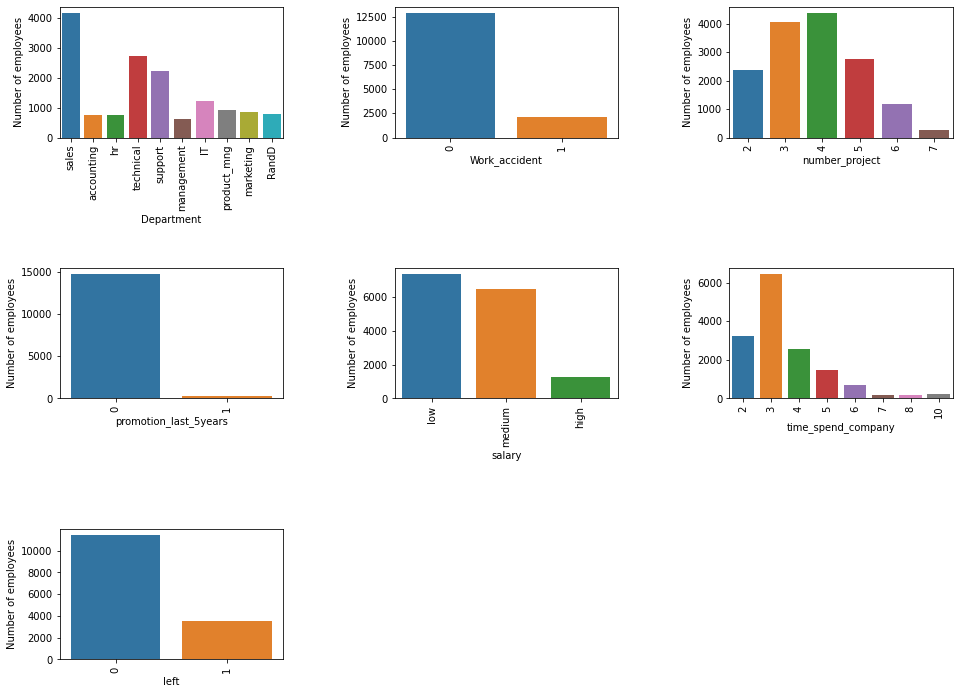

In [16]:
#Plotting employee count graph for each variable
plt_cols = ['Department', 'Work_accident', 'number_project', 'promotion_last_5years', 
            'salary', 'time_spend_company', 'left']
fig=plt.subplots(figsize=(16,12))
for i, j in enumerate(plt_cols):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(wspace=.5, hspace = 1)
    sns.countplot(x=j,data = data)
    plt.ylabel('Number of employees')
    plt.xticks(rotation=90)

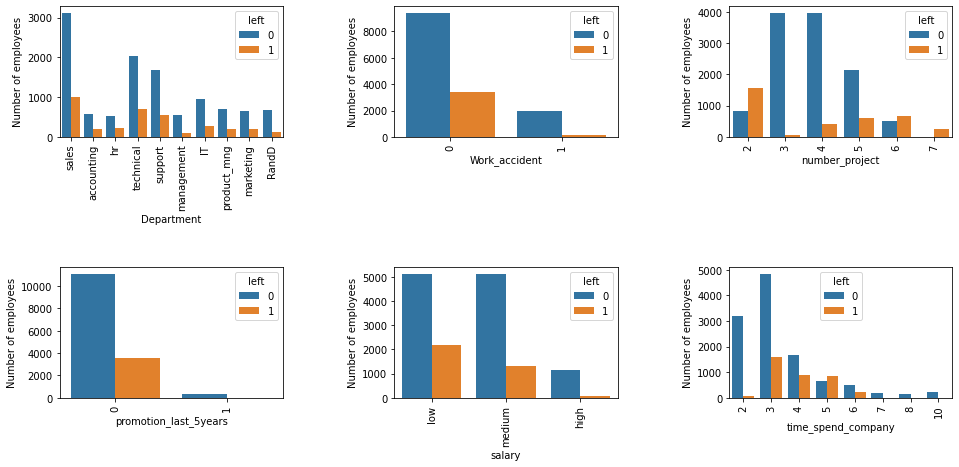

In [17]:
#Number of employees stayed and left based on differnt factors
plt_cols = ['Department', 'Work_accident', 'number_project', 'promotion_last_5years', 
            'salary', 'time_spend_company']
fig=plt.subplots(figsize=(16,12))
for i, j in enumerate(plt_cols):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(wspace=.5, hspace = 1)
    sns.countplot(x=j,data = data, hue = 'left')
    plt.ylabel('Number of employees')
    plt.xticks(rotation=90)

Text(775.9640219907408, 0.5, 'Number of employees')

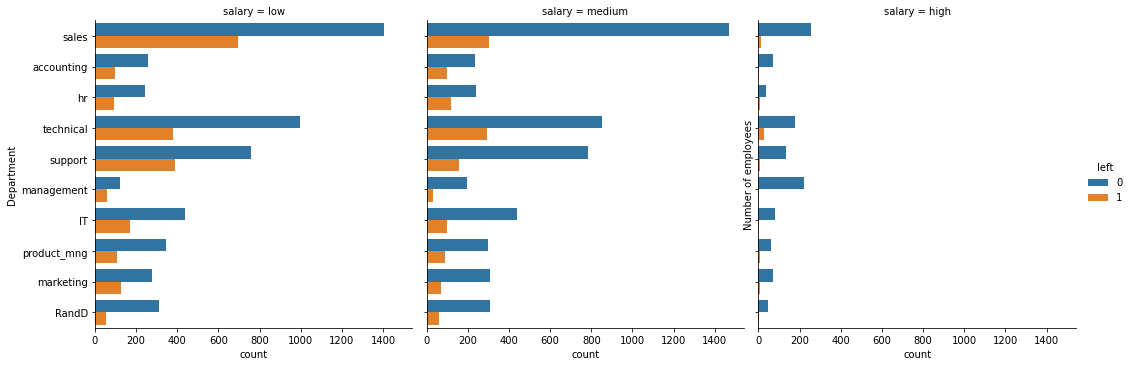

In [18]:
#Effect of Salary across different Departments on Attrition
sns.catplot(data = data, y = 'Department', col = 'salary', hue = 'left', kind = 'count')
plt.ylabel('Number of employees')

C:\Users\test123\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\test123\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='satisfaction_level', ylabel='Density'>

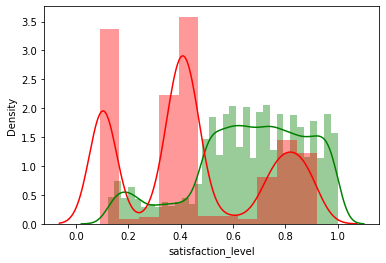

In [19]:
#Satisfaction level effect on Attrition
sns.distplot(data[data.left == 0]['satisfaction_level'], color = 'g')
sns.distplot(data[data.left == 1]['satisfaction_level'], color = 'r')

C:\Users\test123\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\test123\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='last_evaluation', ylabel='Density'>

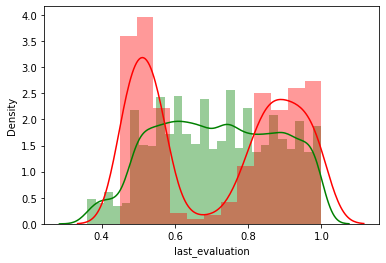

In [20]:
#Satisfaction level effect on Attrition
sns.distplot(data[data.left == 0]['last_evaluation'], color = 'g')
sns.distplot(data[data.left == 1]['last_evaluation'], color = 'r')

<AxesSubplot:>

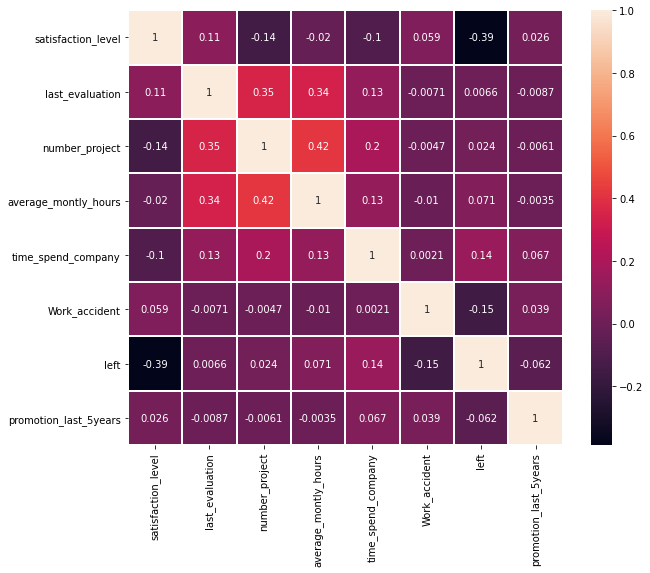

In [21]:
#Correaltion Matrix
plt.figure(figsize = (10,8))
sns.heatmap(data = data.corr(), annot = True, square = True, 
             linewidths = 1)

#### <a>Building a Prediction Model to predict if an employee will leave the company
#### <a>Dependant Variable is 'left'

In [22]:
#Continous and Categorical variables
num_features = ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']
cat_features = ['Work_accident','promotion_last_5years','Department','salary']

In [23]:
#Encoding Categorical Variables
for cat_col in cat_features :
    data = create_dummies(data, cat_col)

In [24]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,Work_accident_1,promotion_last_5years_1,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,1,0,0,0,0,0,0,0,0,1,0,0,1,0


In [25]:
#Separating features
feature_cols = data.columns.difference(['left'])
feature_cols

Index(['Department_RandD', 'Department_accounting', 'Department_hr',
       'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'Work_accident_1', 'average_montly_hours',
       'last_evaluation', 'number_project', 'promotion_last_5years_1',
       'salary_low', 'salary_medium', 'satisfaction_level',
       'time_spend_company'],
      dtype='object')

In [26]:
#Using RFE for feature selection
rf_clf = RandomForestClassifier(random_state = 567)
rfe = RFE(estimator = rf_clf, n_features_to_select = 10)
rfe.fit(data[feature_cols], data['left'])

print(rfe.support_)
print(rfe.ranking_)

[False False False False False False  True False  True  True  True  True
  True False  True  True  True  True]
[7 5 6 4 8 9 1 2 1 1 1 1 1 3 1 1 1 1]


In [27]:
#Getting features and target variable
X = feature_cols[rfe.support_]
Y = 'left'

In [28]:
#Splitting Data into 70% train and 30% test
train_x, test_x, train_y, test_y = train_test_split(data[X], data[Y], test_size = 0.3, random_state = 567)

#### <a>Random Forest Model

In [29]:
#Using GridSearchCV to get best fit parameters
pm = {'n_estimators' : [100,125,150],
      'max_features' : [4,5,6]}

gscv_rf = GridSearchCV(estimator = RandomForestClassifier(random_state = 567), 
                    param_grid = pm,
                    cv = 5,
                    scoring = 'roc_auc',
                    n_jobs = -1).fit(train_x, train_y)

In [30]:
gscv_rf.best_params_

{'max_features': 5, 'n_estimators': 125}

In [31]:
gscv_rf.best_score_

0.9904331309863075

In [32]:
#Rebuidling the model with best fit parameteres
rf = gscv_rf.best_estimator_
rf.fit(train_x, train_y)

#Getting predicted values for test data
rf_pred_y = rf.predict(test_x)

In [33]:
#Evaluating the performance of the model
print('For Train -')
print('Accuracy : ', metrics.accuracy_score(train_y, rf.predict(train_x)))
print('AUC : ', metrics.roc_auc_score(train_y, rf.predict(train_x)))
print('For Test -')
rf_acc = metrics.accuracy_score(test_y, rf_pred_y)
print('Accuracy : ', rf_acc)
print('AUC : ', metrics.roc_auc_score(test_y, rf_pred_y))
rf_log_loss = metrics.log_loss(test_y, rf.predict_proba(test_x))
print('Log Loss : ', rf_log_loss)

For Train -
Accuracy :  1.0
AUC :  1.0
For Test -
Accuracy :  0.9917777777777778
AUC :  0.9849223767004794
Log Loss :  0.07455093824372923


In [34]:
#Comparing Actual values with Predicted values
pd.DataFrame({'Actual' : test_y, 'Predicted' : rf_pred_y}).head(10)

,Actual,Predicted
12607,1,1
2784,0,0
10225,0,0
11977,0,0
11482,0,0
2628,0,0
8392,0,0
11665,0,0
6316,0,0
12372,1,1


Text(33.0, 0.5, 'Actual Label')

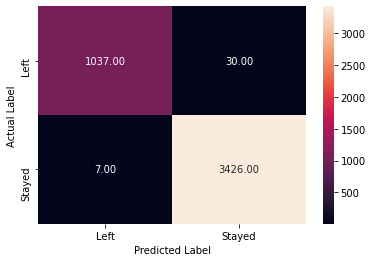

In [35]:
#Creating confusion matrix
cm = metrics.confusion_matrix(test_y, rf_pred_y, labels = [1,0])
sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Left', 'Stayed'], yticklabels = ['Left', 'Stayed'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [36]:
#Classification Metrics Report
print(metrics.classification_report(test_y, rf_pred_y))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3433
           1       0.99      0.97      0.98      1067

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



Text(0, 0.5, 'Feature')

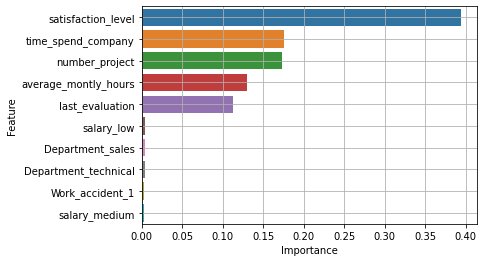

In [37]:
#Getting Feature Importance
fname = pd.Series(X)
imp = pd.Series(rf.feature_importances_)
feat_imp = pd.concat([fname, imp], axis = 1).sort_values(by = 1, ascending = False)
feat_imp.reset_index(drop = True, inplace = True)
sns.barplot(data = feat_imp, x = 1, y = 0)
plt.grid()
plt.xlabel('Importance')
plt.ylabel('Feature')

#### <a>KNN Model

In [38]:
#Using GridSearchCV to get best fit parameters
pm = {'n_neighbors' : [1,3,5,7,9,11]}

gscv_knn = GridSearchCV(estimator = KNeighborsClassifier(), 
                    param_grid = pm,
                    cv = 5,
                    scoring = 'roc_auc',
                    n_jobs = -1).fit(train_x, train_y)

In [39]:
#Best Parameters
gscv_knn.best_params_

{'n_neighbors': 9}

In [40]:
#Best Score
gscv_knn.best_score_

0.9692876560824567

In [41]:
#Rebuidling the model with best fit parameteres
knn = gscv_knn.best_estimator_
knn.fit(train_x, train_y)

#Getting predicted values for test data
knn_pred_y = knn.predict(test_x)

In [42]:
#Evaluating the performance of the model
print('For Train -')
print('Accuracy : ', metrics.accuracy_score(train_y, knn.predict(train_x)))
print('AUC : ', metrics.roc_auc_score(train_y, knn.predict(train_x)))
print('For Test -')
knn_acc = metrics.accuracy_score(test_y, knn_pred_y)
print('Accuracy : ', knn_acc)
print('AUC : ', metrics.roc_auc_score(test_y, knn_pred_y))
knn_log_loss = metrics.log_loss(test_y, knn.predict_proba(test_x))
print('Log Loss : ', knn_log_loss)

For Train -
Accuracy :  0.948185541480141
AUC :  0.9410189974964384
For Test -
Accuracy :  0.9402222222222222
AUC :  0.9327240622537033
Log Loss :  0.501867885196746


In [43]:
#Comparing the Actual values with Predicted values
pd.DataFrame({'Actual' : test_y, 'Predicted' : knn_pred_y}).head(10)

,Actual,Predicted
12607,1,1
2784,0,0
10225,0,0
11977,0,0
11482,0,0
2628,0,0
8392,0,0
11665,0,0
6316,0,0
12372,1,1


Text(33.0, 0.5, 'Actual Label')

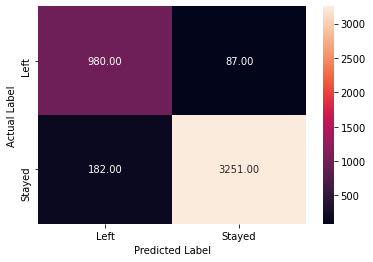

In [44]:
#Creating confusion matrix
cm = metrics.confusion_matrix(test_y, knn_pred_y, labels = [1,0])
sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Left', 'Stayed'], yticklabels = ['Left', 'Stayed'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [45]:
#Classification Metrics Report
print(metrics.classification_report(test_y, knn_pred_y))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3433
           1       0.84      0.92      0.88      1067

    accuracy                           0.94      4500
   macro avg       0.91      0.93      0.92      4500
weighted avg       0.94      0.94      0.94      4500



#### <a>GradientBoostingClassifier Model

In [46]:
#Using GridSearchCV to get best fit parameters
pm = {'max_depth' : [3,5,7,9]}

gscv_gb = GridSearchCV(estimator = GradientBoostingClassifier(random_state = 12), 
                    param_grid = pm,
                    cv = 5,
                    scoring = 'roc_auc',
                    n_jobs = -1).fit(train_x, train_y)

In [47]:
#Best Score
gscv_gb.best_score_

0.991468050765261

In [48]:
#Best Parameters
gscv_gb.best_params_

{'max_depth': 7}

In [49]:
#Rebuidling the model with best fit parameteres
gb = GradientBoostingClassifier(max_depth = 7, n_estimators = 200, random_state = 12)
gb.fit(train_x, train_y)

#Getting predicted values for test data
gb_pred_y = gb.predict(test_x)

In [50]:
#Evaluating the performance of the model
print('For Train -')
print('Accuracy : ', metrics.accuracy_score(train_y, gb.predict(train_x)))
print('AUC : ', metrics.roc_auc_score(train_y, gb.predict(train_x)))
print('For Test -')
gb_acc = metrics.accuracy_score(test_y, gb_pred_y)
print('Accuracy% : ', gb_acc)
print('AUC : ', metrics.roc_auc_score(test_y, gb_pred_y))
gb_log_loss = metrics.log_loss(test_y, gb.predict_proba(test_x))
print('Log Loss : ', gb_log_loss)

For Train -
Accuracy :  1.0
AUC :  1.0
For Test -
Accuracy% :  0.9911111111111112
AUC :  0.984808399428776
Log Loss :  0.0532867869684822


In [51]:
#Comparing Actual values with Predicted values
pd.DataFrame({'Actual' : test_y, 'Predicted' : gb_pred_y}).head(10)

,Actual,Predicted
12607,1,1
2784,0,0
10225,0,0
11977,0,0
11482,0,0
2628,0,0
8392,0,0
11665,0,0
6316,0,0
12372,1,1


Text(33.0, 0.5, 'Actual Label')

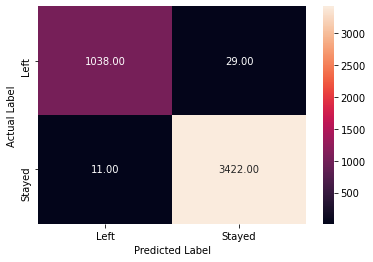

In [52]:
#Creating confusion matrix
cm = metrics.confusion_matrix(test_y, gb_pred_y, labels = [1,0])
sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Left', 'Stayed'], yticklabels = ['Left', 'Stayed'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [53]:
#Classification Metrics Report
print(metrics.classification_report(test_y, gb_pred_y))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3433
           1       0.99      0.97      0.98      1067

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



#### <a>Artificial Neural Network (ANN) Model

In [54]:
#Standardizing the the data
sc = StandardScaler().fit(train_x)
sc_train_x = pd.DataFrame(sc.transform(train_x), columns = train_x.columns, index = train_x.index)
sc_test_x = pd.DataFrame(sc.transform(test_x), columns = test_x.columns, index = test_x.index)

In [55]:
#Input data shape
sc_train_x.shape

(10499, 10)

In [56]:
#Initializing Neural Network
kr = Sequential()
#Adding input layer
kr.add(Dense(5, activation = 'relu', input_dim = 10))
#Adding hidden layer
kr.add(Dense(5, activation = 'relu'))
#Adding output layer
kr.add(Dense(1, activation = 'sigmoid'))

In [57]:
#Model Summary
kr.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 55        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [58]:
#Model Configuration
kr.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 10),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 10),
    'dtype': 'float32',
    'units': 5,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 5,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initiali

In [59]:
#Compiling the model
kr.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#Fitting the model
kr.fit(sc_train_x, train_y, epochs = 20, batch_size = 5, validation_data = (sc_test_x, test_y))

Epoch 1/20
2100/2100 [==============================] - 12s 5ms/step - loss: 0.6246 - accuracy: 0.6849 - val_loss: 0.4898 - val_accuracy: 0.8096
Epoch 2/20
2100/2100 [==============================] - 8s 4ms/step - loss: 0.4753 - accuracy: 0.8130 - val_loss: 0.4345 - val_accuracy: 0.8253
Epoch 3/20
2100/2100 [==============================] - 8s 4ms/step - loss: 0.4162 - accuracy: 0.8463 - val_loss: 0.4020 - val_accuracy: 0.8598
Epoch 4/20
2100/2100 [==============================] - 8s 4ms/step - loss: 0.4005 - accuracy: 0.8577 - val_loss: 0.3884 - val_accuracy: 0.8636
Epoch 5/20
2100/2100 [==============================] - 8s 4ms/step - loss: 0.3796 - accuracy: 0.8683 - val_loss: 0.3855 - val_accuracy: 0.8684
Epoch 6/20
2100/2100 [==============================] - 9s 4ms/step - loss: 0.3790 - accuracy: 0.8668 - val_loss: 0.3807 - val_accuracy: 0.8680
Epoch 7/20
2100/2100 [==============================] - 8s 4ms/step - loss: 0.3741 - accuracy: 0.8702 - val_loss: 0.3803 - val_accuracy

In [60]:
#Getting predicted values for train and test data
kr_pred_train_y = (kr.predict(sc_train_x)>0.5).astype('int64')[:,0]
kr_pred_test_y = (kr.predict(sc_test_x)>0.5).astype('int64')[:,0]

#Getting Prediction Probability
kr_pred_proba_y = kr.predict(sc_test_x)[:,0]

#Evaluating the performance of the model
print('For Train -')
print('Accuracy : ', metrics.accuracy_score(train_y, kr_pred_train_y))
print('AUC : ', metrics.roc_auc_score(train_y, kr_pred_train_y))
print('For Test -')
kr_acc = metrics.accuracy_score(test_y, kr_pred_test_y)
print('Accuracy : ', kr_acc)
print('AUC : ', metrics.roc_auc_score(test_y, kr_pred_test_y))
kr_log_loss = metrics.log_loss(test_y, kr_pred_proba_y)
print('Log Loss : ', kr_log_loss)

For Train -
Accuracy :  0.8707495951995428
AUC :  0.737399173205298
For Test -
Accuracy :  0.8675555555555555
AUC :  0.7326617364785418
Log Loss :  0.3771058005829645


In [61]:
#Comparing Actual Values with predicted values
pd.DataFrame({'Actual' : test_y, 'Predicted' : kr_pred_test_y}).head(10)

,Actual,Predicted
12607,1,1
2784,0,0
10225,0,0
11977,0,0
11482,0,0
2628,0,0
8392,0,0
11665,0,0
6316,0,0
12372,1,0


Text(33.0, 0.5, 'Actual Label')

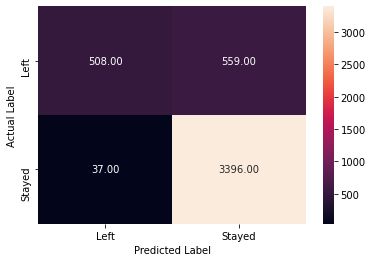

In [62]:
#Creating confusion matrix
cm = metrics.confusion_matrix(test_y, kr_pred_test_y, labels = [1,0])
sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Left', 'Stayed'], yticklabels = ['Left', 'Stayed'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [63]:
#Classification Metrics Report
print(metrics.classification_report(test_y, kr_pred_test_y))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      3433
           1       0.93      0.48      0.63      1067

    accuracy                           0.87      4500
   macro avg       0.90      0.73      0.77      4500
weighted avg       0.88      0.87      0.85      4500



#### <a>Analyzing the performance of each model by Accuracy and Log Loss

In [64]:
#Creating Dataframe for accuracy and log loss of each model
vc_data = pd.DataFrame({'Classifiers' : ['RandomForestClassifier', 'KNeighborsClassifier', 'GradientBoostingClassifier', 'ArtificialNeuralNetwork'],
                        'Accuracy %' : [rf_acc,knn_acc,gb_acc,kr_acc],
                        'Log_Loss' : [rf_log_loss, knn_log_loss, gb_log_loss, kr_log_loss]})

In [65]:
vc_data['Accuracy %'] = vc_data['Accuracy %'].apply(lambda x : round((x*100),2))

In [66]:
vc_data

,Classifiers,Accuracy %,Log_Loss
0,RandomForestClassifier,99.18,0.074551
1,KNeighborsClassifier,94.02,0.501868
2,GradientBoostingClassifier,99.11,0.053287
3,ArtificialNeuralNetwork,86.76,0.377106


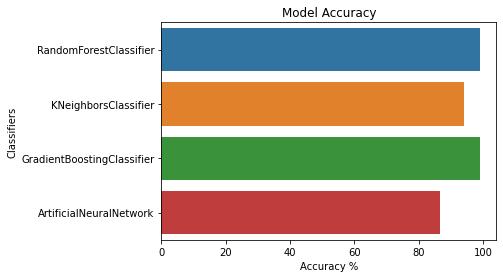

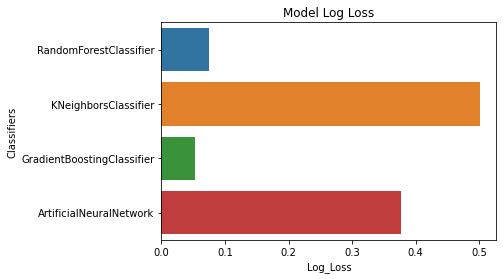

In [67]:
#Visualizing the performance of each model
sns.barplot(data = vc_data, x = vc_data['Accuracy %'], y = vc_data.Classifiers)
plt.title('Model Accuracy')
plt.show()

sns.barplot(data = vc_data, x = vc_data['Log_Loss'], y = vc_data.Classifiers)
plt.title('Model Log Loss')
plt.show()